Importing Libraries

In [91]:
import numpy as np
import pandas as pd

Preparation Of Data

In [92]:
df=pd.read_csv('Dataset/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Exploratory Data Analysis

In [94]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [95]:
concolumns=["age","trestbps","chol","thalach","oldpeak"]
df[concolumns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [96]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [97]:
over_30=df[df['age']>30]
over_30.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


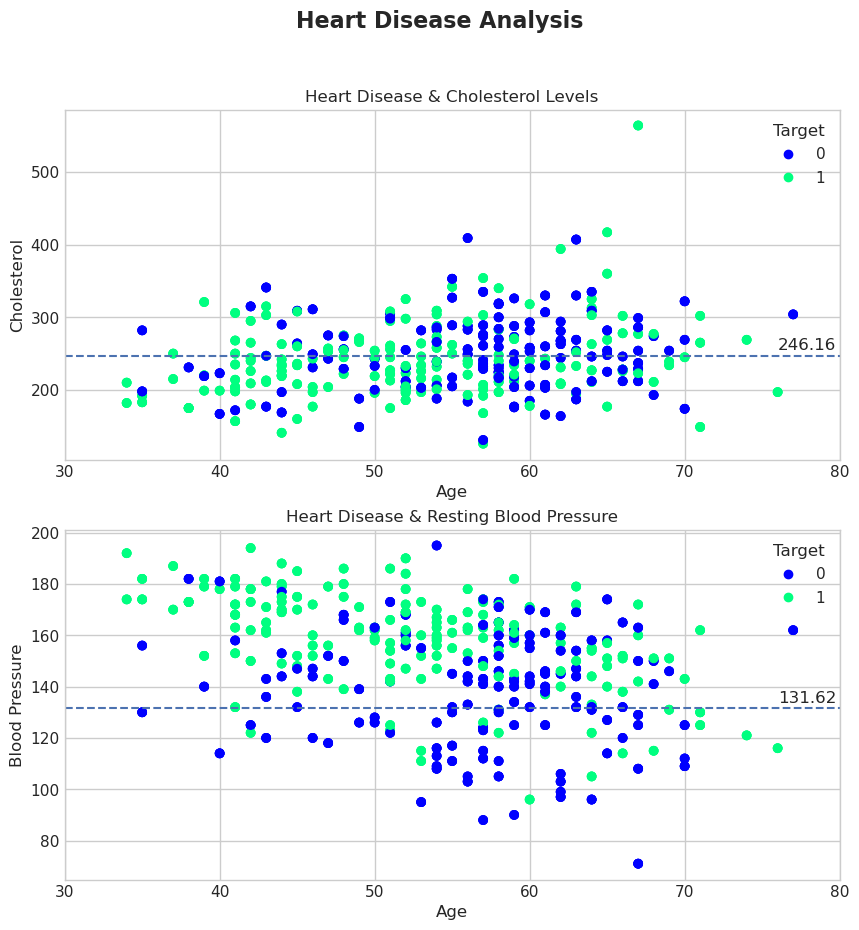

In [98]:
from matplotlib import pyplot as plt 
import seaborn as sn

plt.style.use('seaborn-v0_8-whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Heart Disease & Cholesterol Levels
ax0.scatter(x=over_30["age"], y=over_30["chol"], c=over_30["target"], cmap="winter")
ax0.set(title="Heart Disease & Cholesterol Levels", xlabel="Age", ylabel="Cholesterol", xlim=[30, 80])
ax0.legend(*ax0.collections[0].legend_elements(), title="Target")
ax0.axhline(y=over_30["chol"].mean(), linestyle="--")
ax0.text(76, over_30["chol"].mean() + 10, round(over_30["chol"].mean(), 2))

# Heart Disease & Resting Blood Pressure
ax1.scatter(x=over_30["age"], y=over_30["thalach"], c=over_30["target"], cmap="winter")
ax1.set(title="Heart Disease & Resting Blood Pressure", xlabel="Age", ylabel="Blood Pressure", xlim=[30, 80])
ax1.legend(*ax1.collections[0].legend_elements(), title="Target")
ax1.axhline(y=over_30["trestbps"].mean(), linestyle="--")
ax1.text(76, over_30["trestbps"].mean() + 2, round(over_30["trestbps"].mean(), 2))

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")

plt.show()


In [99]:
for column in df.columns: 
       num=len(df[column].unique())
       print(column,":",num)

age : 41
sex : 2
cp : 4
trestbps : 49
chol : 152
fbs : 2
restecg : 3
thalach : 91
exang : 2
oldpeak : 40
slope : 3
ca : 5
thal : 4
target : 2


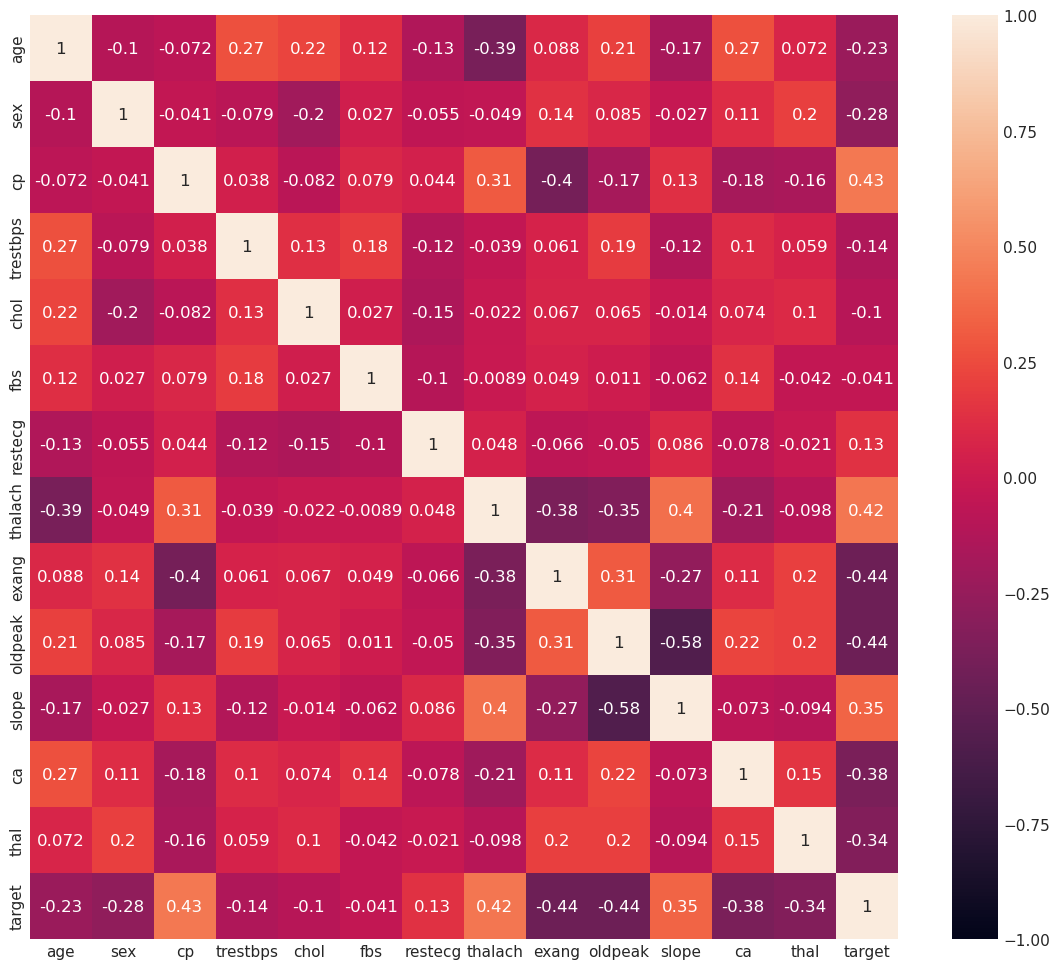

In [105]:
plt.figure(figsize=(14,12)) 
sn.heatmap(df.corr(), annot=True , vmin=-1) 
plt.show()

Data Splitting and Preprocessing

In [111]:
y = df['target']
x = df.drop('target', axis=1)

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,train_size=0.7)

In [114]:
Y_train.value_counts()

target
0    364
1    353
Name: count, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train, Y_train=sm.fit_resample(X_train, Y_train)

In [116]:
Y_train.value_counts()

target
0    364
1    364
Name: count, dtype: int64

Model Development and Performance Evaluation

In [118]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras import layers
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, ConfusionMatrixDisplay

Logistic Regression

Confusion Matrix
[[133  30]
 [ 15 130]] 

Accuracy of Logistic Regression: 85.3896103896104 

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       163
           1       0.81      0.90      0.85       145

    accuracy                           0.85       308
   macro avg       0.86      0.86      0.85       308
weighted avg       0.86      0.85      0.85       308



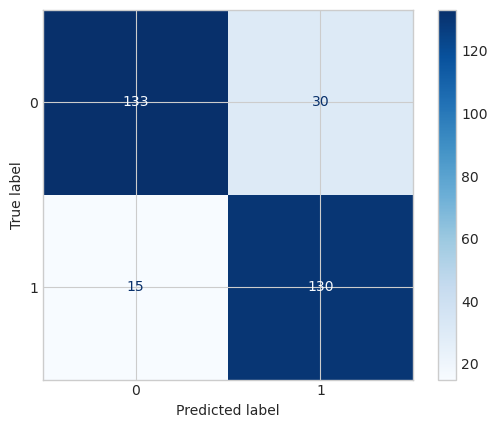

In [43]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)
model1_predict=model1.predict(X_test)
model1_conf_matrix=confusion_matrix(Y_test,model1_predict)
model1_acc=model1.score(X_test,Y_test)

print('Confusion Matrix')
print(model1_conf_matrix,'\n')
ConfusionMatrixDisplay.from_estimator(model1,X_test,Y_test,cmap='Blues')
print("Accuracy of Logistic Regression:",model1_acc*100,'\n')
print(classification_report(Y_test,model1_predict))

RandomForest Classifier

Confusion Matrix
[[163   0]
 [  0 145]] 

Accuracy of Random Forest: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       145

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



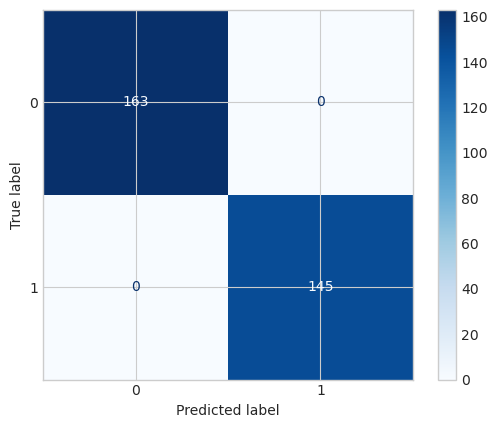

In [42]:
model2=RandomForestClassifier()
model2.fit(X_train,Y_train)

model2_predict=model2.predict(X_test)
model2_conf_matrix=confusion_matrix(Y_test,model2_predict)
model2_acc=model2.score(X_test,Y_test)

print('Confusion Matrix')
print(model2_conf_matrix,'\n')
ConfusionMatrixDisplay.from_estimator(model2,X_test,Y_test,cmap='Blues')
print("Accuracy of Random Forest:",model2_acc*100,'\n')
print(classification_report(Y_test,model2_predict))

ANN

In [19]:
model3=keras.Sequential([layers.Dense(36,activation='relu',input_shape=[13]),
                         layers.Dense(26,activation='relu'),
                         layers.Dense(15,activation='relu'),
                         layers.Dense(10,activation='relu'),
                         layers.Dense(5,activation='relu'),
                         layers.Dense(2,activation='softmax')])
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model3.fit(X_train,Y_train,epochs=150)

/home/tf-gpu/anaconda3/envs/tensorflow/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738604851.241246    1041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738604851.499748    1041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738604851.499935    1041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1738604851.507101    1041 cuda_exec

Epoch 1/150


I0000 00:00:1738604853.672700    7806 service.cc:146] XLA service 0x7f23d400c970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738604853.672782    7806 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-02-03 17:47:33.718798: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-03 17:47:34.120297: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8900


 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4902 - loss: 0.7049

I0000 00:00:1738604856.601015    7806 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 195ms/step - accuracy: 0.5063 - loss: 0.6873
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - loss: 0.6065
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.5627
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.5196
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8523 - loss: 0.4839
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8428 - loss: 0.4731
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.4342
Epoch 8/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.4061
Epoch 9/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8401 - loss: 0.3931
Epoch 10/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3639
Epoch 11/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.3320
Epoch 12/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix
[[163   0]
 [  0 145]] 

Accuracy of ANN: 100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       145

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



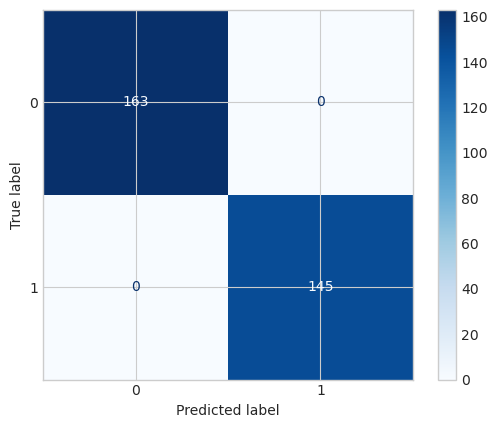

In [28]:
model3_predict=model3.predict(X_test)
# model3_predict=[1 if element>0.5 else 0 for element in model3_predict]
model3_conf_matrix=confusion_matrix(Y_test,np.argmax(model3_predict,axis=1))
model3_acc=accuracy_score(np.argmax(model3_predict,axis=1),Y_test)

print('Confusion Matrix')
print(model3_conf_matrix,'\n')
print("Accuracy of ANN:",model3_acc*100,'\n')
print(classification_report(Y_test,np.argmax(model3_predict,axis=1)))
disp = ConfusionMatrixDisplay(confusion_matrix=model3_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

XGBRegressor

Confusion Matrix
[[163   0]
 [  0 145]] 

Accuracy of XGBRegressor: 99.70545172691345 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       145

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



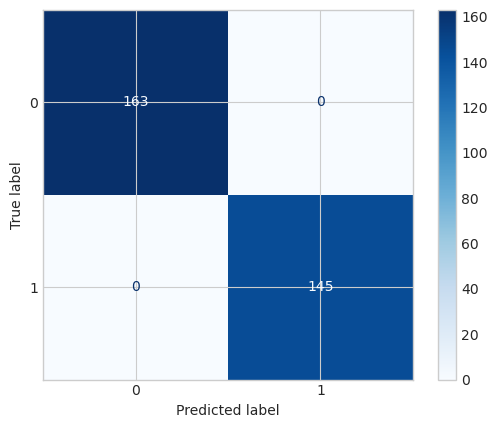

In [62]:
model4=XGBRegressor(n_estimators=500)
model4.fit(X_train,Y_train)

model4_predict=model4.predict(X_test)
model4_predict=[1 if element>0.5 else 0 for element in model4_predict]
model4_conf_matrix=confusion_matrix(Y_test,model4_predict)
model4_acc=model4.score(X_test,Y_test)

print('Confusion Matrix')
print(model4_conf_matrix,'\n')
print("Accuracy of XGBRegressor:",model4_acc*100,'\n')
print(classification_report(Y_test,model4_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=model4_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

KNeighborsClassifier

Confusion Matrix
[[163   0]
 [  3 142]] 

Accuracy of K-NeighborsClassifier: 99.02597402597402 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       163
           1       1.00      0.98      0.99       145

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



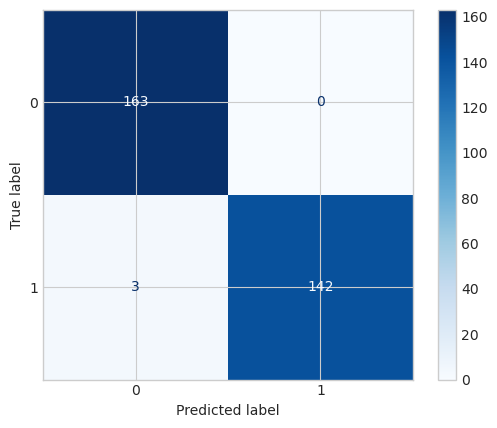

In [41]:
model5=KNeighborsClassifier(leaf_size=1,n_neighbors=5,weights='distance')
model5.fit(X_train,Y_train)

model5_predict=model5.predict(X_test)
model5_conf_matrix=confusion_matrix(Y_test,model5_predict)
model5_acc=model5.score(X_test,Y_test)

print('Confusion Matrix')
print(model5_conf_matrix,'\n')
print("Accuracy of K-NeighborsClassifier:",model5_acc*100,'\n')
print(classification_report(Y_test,model5_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=model5_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

DecisionTree Classifier

Confusion Matrix
[[158   5]
 [  0 145]] 

Accuracy of DecisionTree Classifier: 98.37662337662337 

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       163
           1       0.97      1.00      0.98       145

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



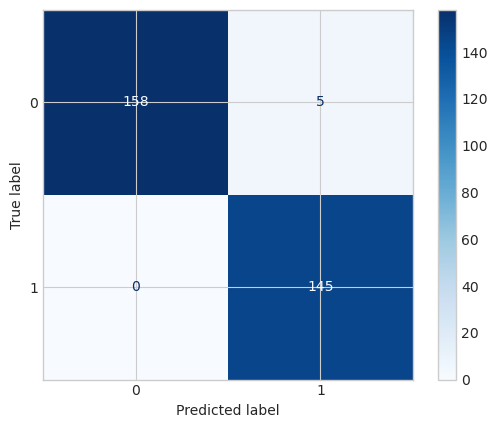

In [55]:
model6=tree.DecisionTreeClassifier(max_depth=10,random_state=0,criterion='log_loss')
model6.fit(X_train,Y_train)

model6_predict=model6.predict(X_test)
model6_conf_matrix=confusion_matrix(Y_test,model6_predict)
model6_acc=model6.score(X_test,Y_test)

print('Confusion Matrix')
print(model6_conf_matrix,'\n')
print("Accuracy of DecisionTree Classifier:",model6_acc*100,'\n')
print(classification_report(Y_test,model6_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=model6_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

Support Vector Classifier

Confusion Matrix
[[154   9]
 [  7 138]] 

Accuracy of Support Vector Classifier: 94.8051948051948 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       163
           1       0.94      0.95      0.95       145

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308



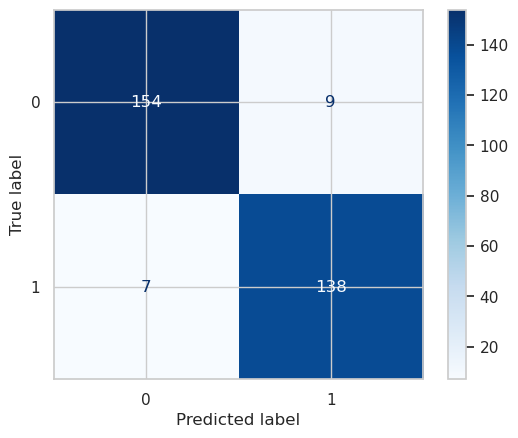

In [89]:
model7=SVC(kernel='rbf',C=4)
model7.fit(X_train,Y_train)

model7_predict=model7.predict(X_test)
model7_conf_matrix=confusion_matrix(Y_test,model7_predict)
model7_acc=model7.score(X_test,Y_test)

print('Confusion Matrix')
print(model7_conf_matrix,'\n')
print("Accuracy of Support Vector Classifier:",model7_acc*100,'\n')
print(classification_report(Y_test,model7_predict))
disp = ConfusionMatrixDisplay(confusion_matrix=model7_conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.show()

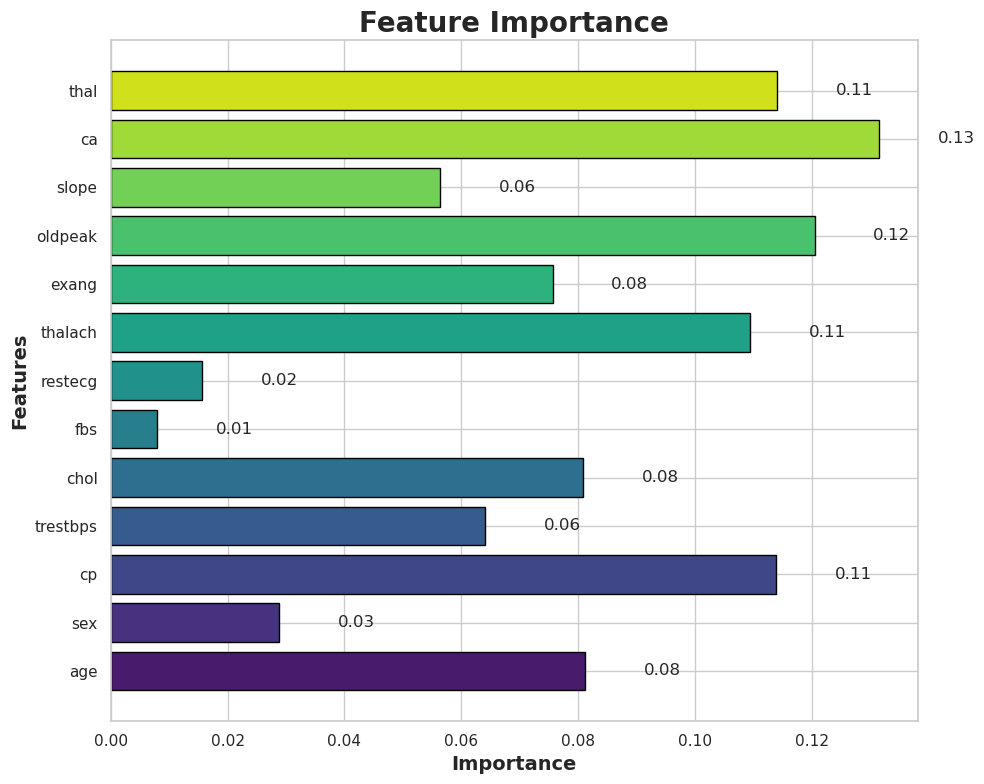

In [88]:
sn.set(style='whitegrid')
imp_feature = pd.DataFrame({'feature': list(X_train.columns), 'Importance': model2.feature_importances_})
plt.figure(figsize=(10, 8))
plt.title('Feature Importance', fontsize=20, fontweight='bold')
plt.xlabel('Importance', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')
bars = plt.barh(imp_feature['feature'], imp_feature['Importance'], color=sn.color_palette('viridis', len(imp_feature['feature'])), edgecolor='black')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}', ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

Model Evaluation

In [79]:
model_ev=pd.DataFrame({'Model':['Logistic Regression','Random Forest'
                                ,'ANN','XGBRegressor','KNN','Decision Tree','Support Vector Classifier'],
                                'Accuracy':pd.Series([model1_acc,model2_acc,model3_acc,
                                            model4_acc,model5_acc,model6_acc,model7_acc])*100})
model_ev

,Model,Accuracy
0,Logistic Regression,85.389610
1,Random Forest,100.000000
2,ANN,100.000000
3,XGBRegressor,99.705452
4,KNN,99.025974
5,Decision Tree,98.376623
6,Support Vector Classifier,94.805195


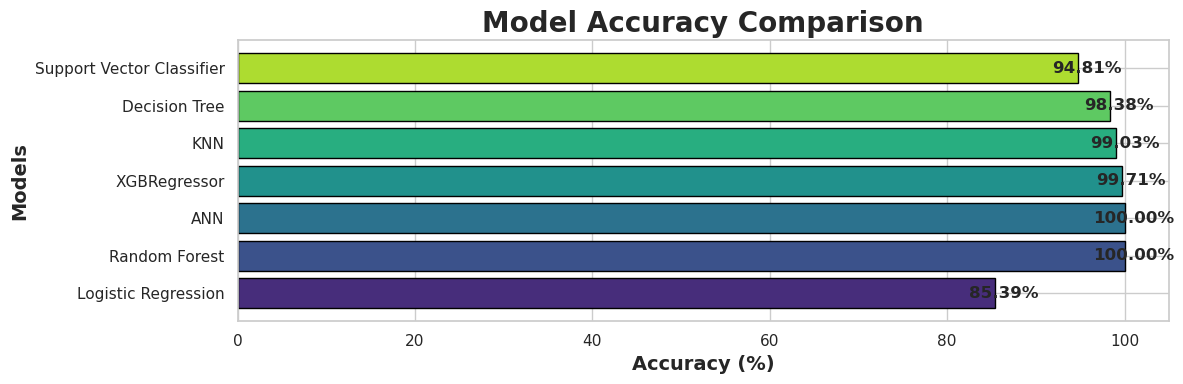

In [85]:
sn.set(style='whitegrid')
plt.figure(figsize=(12, 4))
plt.title("Model Accuracy Comparison", fontsize=20, fontweight='bold')
plt.xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.ylabel('Models', fontsize=14, fontweight='bold')
bars = plt.barh(model_ev['Model'], model_ev['Accuracy'], color=sn.color_palette('viridis', len(model_ev['Model'])), edgecolor='black')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', ha='center', va='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()